In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Send a GET request to the specified URL (Ilia Topuria's UFC stats page)
r = requests.get('http://ufcstats.com/fighter-details/54f64b5e283b0ce7')

# Print the status code of the response to ensure the request was successful (200 means OK)
print(r)

# Parse the content of the response using BeautifulSoup for HTML parsing
soup = BeautifulSoup(r.content, 'html.parser')

# Print the prettified version of the parsed HTML, which formats the HTML in a more readable manner
print(soup.prettify())


<Response [200]>
<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js ie8 lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Stats | UFC
  </title>
  <meta content="" name="description"/>
  <meta content="" name="viewport"/>
  <link href="/blocks/main.css?ver=777056" rel="stylesheet"/>
  <script src="/js/vendor/modernizr-2.6.2.min.js">
  </script>
  <script>
   (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
    m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
    })(window,document,'script','//www.google-analytics.com/analytics.js','ga');

    ga('create', 'U

In [3]:
# ## Initialize an empty DataFrame for Ilia Topuria's fight statistics
illia_topuria = pd.DataFrame(columns=[
    'W/L',                # Win or Loss outcome
    'Fighter',            # Name of the fighter
    'Knockdown',          # Number of knockdowns
    'Strikes',            # Number of strikes
    'Takedowns',          # Number of takedowns
    'SubmissionAttempt',  # Submission attempts
    'Event',              # Event name
    'WinMethod',          # Method of victory
    'Round',              # Round in which the fight ended
    'Time'                # Time at which the fight ended
])

# ## Scraping data from the HTML table

# Find all the rows in the table body (tbody)
rows = soup.find('tbody').find_all('tr')

# Loop through each row in the table
for row in rows:
    # Extract the data from each column (td) in the row
    col = row.find_all('td')
    
    # Only process rows that have at least 10 columns
    if len(col) >= 10:
        # Clean and extract the text from each cell, removing newlines
        winorlose = col[0].text.strip().replace('\n', '')
        fighter = col[1].text.strip().replace('\n', '')
        knockdown = col[2].text.strip().replace('\n', '')
        strikes = col[3].text.strip().replace('\n', '')
        takedowns = col[4].text.strip().replace('\n', '')
        submissionattempt = col[5].text.strip().replace('\n', '')
        event = col[6].text.strip().replace('\n', '')
        winmethod = col[7].text.strip().replace('\n', '')
        round = col[8].text.strip().replace('\n', '')
        time = col[9].text.strip().replace('\n', '')
        
        # ## Append the extracted data as a new row in the DataFrame
        illia_topuria = pd.concat([illia_topuria, pd.DataFrame({
            'W/L': [winorlose],
            'Fighter': [fighter],
            'Knockdown': [knockdown],
            'Strikes': [strikes],
            'Takedowns': [takedowns],
            'SubmissionAttempt': [submissionattempt],
            'Event': [event],
            'WinMethod': [winmethod],
            'Round': [round],
            'Time': [time]
        })], ignore_index=True)

# ## Display the first few rows of the DataFrame to inspect the data
illia_topuria.head()


,W/L,Fighter,Knockdown,Strikes,Takedowns,SubmissionAttempt,Event,WinMethod,Round,Time
0,win,Ilia Topuria Alexander Vo...,1 0,35 47,0 0,0 0,UFC 298: Volkanovski vs. Topuria ...,KO/TKO Punch,2,3:32
1,win,Ilia Topuria Josh Emmett,1 0,152 87,3 0,0 0,UFC Fight Night: Emmett vs. Topuria ...,U-DEC,5,5:00
2,win,Ilia Topuria Bryce Mitchell,1 0,40 36,0 1,1 0,UFC 282: Blachowicz vs. Ankalaev ...,SUB Arm Triangle,2,3:10
3,win,Ilia Topuria Jai Herbert,1 1,20 22,1 0,0 0,UFC Fight Night: Volkov vs. Aspinall ...,KO/TKO Punch,2,1:07
4,win,Ilia Topuria Ryan Hall,0 0,18 10,0 0,0 0,UFC 264: Poirier vs. McGregor 3 ...,KO/TKO Punches,1,4:47


In [4]:
# Extract and clean specific columns in the DataFrame

# Extracting the first part (landed knockdowns) from the 'Knockdown' column
illia_topuria['Knockdowns'] = illia_topuria['Knockdown'].str.split(pat=' ').str[0]

# Extracting the first part (landed strikes) from the 'Strikes' column
illia_topuria['Strike'] = illia_topuria['Strikes'].str.split(pat=' ').str[0]

# Extracting the first part (landed takedowns) from the 'Takedowns' column
illia_topuria['Takedown'] = illia_topuria['Takedowns'].str.split(pat=' ').str[0]

# Extracting the first part (number of submission attempts) from the 'SubmissionAttempt' column
illia_topuria['SubmissionAttempts'] = illia_topuria['SubmissionAttempt'].str.split(pat=' ').str[0]

# Extracting the method of win (first word) from the 'WinMethod' column
illia_topuria['Method_of_Win'] = illia_topuria['WinMethod'].str.split(pat=' ').str[0]

# Extracting the opponent's name by splitting the 'Fighter' column at 'Topuria'
illia_topuria['Opponent'] = illia_topuria['Fighter'].str.split(pat='Topuria').str[1]


# Drop original columns that are no longer needed

# Dropping the 'Knockdown' column
illia_topuria = illia_topuria.drop(['Knockdown'], axis=1)

# Dropping the 'Strikes' column
illia_topuria = illia_topuria.drop(['Strikes'], axis=1)

# Dropping the 'Takedowns' column
illia_topuria = illia_topuria.drop(['Takedowns'], axis=1)

# Dropping the 'SubmissionAttempt' column
illia_topuria = illia_topuria.drop(['SubmissionAttempt'], axis=1)

# Dropping the 'WinMethod' column
illia_topuria = illia_topuria.drop(['WinMethod'], axis=1)

# Dropping the 'Fighter' column
illia_topuria = illia_topuria.drop(['Fighter'], axis=1)


FINDING STRIKE DATA OF ILLIA TOPURIA

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define list of URLs to scrape fight data from
data_url = [
    'http://ufcstats.com/fight-details/bec3154a11df3299',
    'http://ufcstats.com/fight-details/c3ef3cb03edde8bb',
    'http://ufcstats.com/fight-details/4a17876e99f6baf3',
    'http://ufcstats.com/fight-details/a200b5dcbdd2506e',
    'http://ufcstats.com/fight-details/07468b6347ac5e3d',
    'http://ufcstats.com/fight-details/b1be8b41b1a4fd85',
    'http://ufcstats.com/fight-details/22fe6779c3fa649d'
]

# Define columns for the significant strikes DataFrame
columns = ['Fighter', 'Sig. Str.', 'Sig. Str. %', 'Head', 'Body', 'Leg', 'Distance', 'Clinch', 'Ground']

# Create an empty DataFrame for Ilia Topuria's significant strikes
illia_significant_strikes = pd.DataFrame(columns=columns)

# Function to scrape fight data for a given URL
def scrape_fight_data(fight_url):
    try:
        # Send a request to the URL
        response = requests.get(fight_url)
        response.raise_for_status()  # Ensure the request succeeded
        
        # Parse the response content with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Locate the table after the 'Significant Strikes' section
        sig_strikes_table = soup.find_all('table')[-2]  # This gets the second to last table which contains the significant strikes

        if not sig_strikes_table:
            print(f"No significant strikes table found on {fight_url}")
            return None

        # Initialize a list to hold all fighter data
        all_fighter_data = []

        # Extract the rows of the table (each row corresponds to a fighter)
        rows = sig_strikes_table.find('tbody').find_all('tr')
        for row in rows:
            cols = [col.text.strip() for col in row.find_all('td')]
            fighter_data = dict(zip(columns, cols))
            # Only keep data for Ilia Topuria
            if 'Ilia Topuria' in fighter_data['Fighter']:
                all_fighter_data.append(fighter_data)

        return all_fighter_data
    except Exception as e:
        print(f"Error scraping {fight_url}: {e}")
        return None

# Loop through the URLs, scrape data, and append to the Illia Topuria DataFrame
for url in data_url:
    fight_data = scrape_fight_data(url)
    if fight_data:
        # Append scraped data to the DataFrame
        fight_df = pd.DataFrame(fight_data, columns=columns)
        illia_significant_strikes = pd.concat([illia_significant_strikes, fight_df], ignore_index=True)

# Display the final DataFrame
print(illia_significant_strikes.head())


                                    Fighter  \
0  Alexander Volkanovski \n\n\nIlia Topuria   
1            Josh Emmett \n\n\nIlia Topuria   
2         Bryce Mitchell \n\n\nIlia Topuria   
3            Jai Herbert \n\n\nIlia Topuria   
4              Ryan Hall \n\n\nIlia Topuria   

                             Sig. Str.             Sig. Str. %  \
0    47 of 107\n    \n\n      35 of 77  43%\n    \n\n      45%   
1  87 of 305\n    \n\n      152 of 344  28%\n    \n\n      44%   
2     36 of 82\n    \n\n      40 of 77  43%\n    \n\n      51%   
3     22 of 63\n    \n\n      20 of 41  34%\n    \n\n      48%   
4     10 of 17\n    \n\n      18 of 32  58%\n    \n\n      56%   

                                  Head                              Body  \
0     21 of 68\n    \n\n      17 of 53  11 of 22\n    \n\n      12 of 16   
1  43 of 232\n    \n\n      124 of 302   26 of 53\n    \n\n      9 of 16   
2     22 of 57\n    \n\n      34 of 63   11 of 22\n    \n\n      5 of 13   
3     20 of 60\n

## Before applying any transformations, it’s important to inspect the structure of the columns to understand how the data is formatted.

We will:

### Display the Raw Data
Check the contents of the columns to see if there are any irregularities (such as extra spaces or newlines).

### Split the Data
Split the data in the column to understand how the values are being parsed and identify where the second part of the strikes is located.

### Identify Issues
Review the result of the split to check for empty or misplaced values.


In [6]:
# Define the column names to inspect
col_names = ['Sig. Str.', 'Head', 'Body', 'Leg', 'Distance', 'Clinch', 'Ground']

# Iterate through each column name in the list
for i in col_names:
    # Print the logic for the current column
    print(f"Logic of {i}")
    
    # Print the result of splitting the data in the column by spaces
    # This helps in inspecting how the values are formatted and if there are any irregularities
    print(illia_significant_strikes[i].str.split(pat=' '))
    
    # Print a newline for better readability between results
    print("""\n""")


Logic of Sig. Str.
0    [47, of, 107\n, , , , \n\n, , , , , , 35, of, 77]
1    [87, of, 305\n, , , , \n\n, , , , , , 152, of,...
2     [36, of, 82\n, , , , \n\n, , , , , , 40, of, 77]
3     [22, of, 63\n, , , , \n\n, , , , , , 20, of, 41]
4     [10, of, 17\n, , , , \n\n, , , , , , 18, of, 32]
5     [31, of, 63\n, , , , \n\n, , , , , , 16, of, 52]
6     [17, of, 53\n, , , , \n\n, , , , , , 13, of, 33]
Name: Sig. Str., dtype: object


Logic of Head
0     [21, of, 68\n, , , , \n\n, , , , , , 17, of, 53]
1    [43, of, 232\n, , , , \n\n, , , , , , 124, of,...
2     [22, of, 57\n, , , , \n\n, , , , , , 34, of, 63]
3     [20, of, 60\n, , , , \n\n, , , , , , 17, of, 37]
4       [2, of, 7\n, , , , \n\n, , , , , , 11, of, 24]
5     [12, of, 34\n, , , , \n\n, , , , , , 10, of, 40]
6      [10, of, 43\n, , , , \n\n, , , , , , 7, of, 23]
Name: Head, dtype: object


Logic of Body
0    [11, of, 22\n, , , , \n\n, , , , , , 12, of, 16]
1     [26, of, 53\n, , , , \n\n, , , , , , 9, of, 16]
2     [11, of,

In [7]:
# First, clean the  column by removing multiple spaces and newlines
# Using the col_names list from previous cell here as well
for i in col_names:
    illia_significant_strikes[i] = illia_significant_strikes[i].str.replace(r'\s+', ' ', regex=True)

# Now apply the splitting logic to extract the second part of the strikes 



# Check the results
illia_significant_strikes.head()


,Fighter,Sig. Str.,Sig. Str. %,Head,Body,Leg,Distance,Clinch,Ground
0,Alexander Volkanovski \n\n\nIlia Topuria,47 of 107 35 of 77,43%\n \n\n 45%,21 of 68 17 of 53,11 of 22 12 of 16,15 of 17 6 of 8,44 of 102 28 of 70,3 of 5 4 of 4,0 of 0 3 of 3
1,Josh Emmett \n\n\nIlia Topuria,87 of 305 152 of 344,28%\n \n\n 44%,43 of 232 124 of 302,26 of 53 9 of 16,18 of 20 19 of 26,87 of 305 114 of 289,0 of 0 2 of 2,0 of 0 36 of 53
2,Bryce Mitchell \n\n\nIlia Topuria,36 of 82 40 of 77,43%\n \n\n 51%,22 of 57 34 of 63,11 of 22 5 of 13,3 of 3 1 of 1,34 of 79 29 of 64,1 of 1 3 of 4,1 of 2 8 of 9
3,Jai Herbert \n\n\nIlia Topuria,22 of 63 20 of 41,34%\n \n\n 48%,20 of 60 17 of 37,1 of 2 3 of 4,1 of 1 0 of 0,19 of 59 14 of 35,1 of 1 2 of 2,2 of 3 4 of 4
4,Ryan Hall \n\n\nIlia Topuria,10 of 17 18 of 32,58%\n \n\n 56%,2 of 7 11 of 24,4 of 5 2 of 2,4 of 5 5 of 6,9 of 16 3 of 8,0 of 0 0 of 0,1 of 1 15 of 24


In [8]:
# Iterate through each column name in col_names
for i in col_names:
    # Split the column data by spaces and extract the 4th, 5th, and 6th elements
    # Concatenate these elements with spaces in between and update the column
    illia_significant_strikes[i] = illia_significant_strikes[i].str.split(' ').str[3] + ' ' + illia_significant_strikes[i].str.split(' ').str[4] + ' ' + illia_significant_strikes[i].str.split(' ').str[5]

# Display the first few rows of the DataFrame to verify the changes
illia_significant_strikes.head()


,Fighter,Sig. Str.,Sig. Str. %,Head,Body,Leg,Distance,Clinch,Ground
0,Alexander Volkanovski \n\n\nIlia Topuria,35 of 77,43%\n \n\n 45%,17 of 53,12 of 16,6 of 8,28 of 70,4 of 4,3 of 3
1,Josh Emmett \n\n\nIlia Topuria,152 of 344,28%\n \n\n 44%,124 of 302,9 of 16,19 of 26,114 of 289,2 of 2,36 of 53
2,Bryce Mitchell \n\n\nIlia Topuria,40 of 77,43%\n \n\n 51%,34 of 63,5 of 13,1 of 1,29 of 64,3 of 4,8 of 9
3,Jai Herbert \n\n\nIlia Topuria,20 of 41,34%\n \n\n 48%,17 of 37,3 of 4,0 of 0,14 of 35,2 of 2,4 of 4
4,Ryan Hall \n\n\nIlia Topuria,18 of 32,58%\n \n\n 56%,11 of 24,2 of 2,5 of 6,3 of 8,0 of 0,15 of 24


In [9]:
# List of new column names where the transformed data will be stored
landed_col_names = ['Significant_Strikes_Landed', 'Head_Landed', 'Body_Landed', 'Leg_Landed', 'Distance_Landed', 'Clinch_Landed', 'Ground_Landed']

# Use zip() to iterate over both col_names and landed_col_names simultaneously
for i, j in zip(col_names, landed_col_names):
    # For each pair of original and new column names, split the data in the original column by spaces
    # Select the first part (index 0) of the split data and assign it to the new column
    illia_significant_strikes[j] = illia_significant_strikes[i].str.split(' ').str[0]

# Display the first few rows of the DataFrame to check the results
illia_significant_strikes.head()


,Fighter,Sig. Str.,Sig. Str. %,Head,Body,Leg,Distance,Clinch,Ground,Significant_Strikes_Landed,Head_Landed,Body_Landed,Leg_Landed,Distance_Landed,Clinch_Landed,Ground_Landed
0,Alexander Volkanovski \n\n\nIlia Topuria,35 of 77,43%\n \n\n 45%,17 of 53,12 of 16,6 of 8,28 of 70,4 of 4,3 of 3,35,17,12,6,28,4,3
1,Josh Emmett \n\n\nIlia Topuria,152 of 344,28%\n \n\n 44%,124 of 302,9 of 16,19 of 26,114 of 289,2 of 2,36 of 53,152,124,9,19,114,2,36
2,Bryce Mitchell \n\n\nIlia Topuria,40 of 77,43%\n \n\n 51%,34 of 63,5 of 13,1 of 1,29 of 64,3 of 4,8 of 9,40,34,5,1,29,3,8
3,Jai Herbert \n\n\nIlia Topuria,20 of 41,34%\n \n\n 48%,17 of 37,3 of 4,0 of 0,14 of 35,2 of 2,4 of 4,20,17,3,0,14,2,4
4,Ryan Hall \n\n\nIlia Topuria,18 of 32,58%\n \n\n 56%,11 of 24,2 of 2,5 of 6,3 of 8,0 of 0,15 of 24,18,11,2,5,3,0,15


In [10]:
# List of new column names where the transformed data for attempted strikes will be stored
attempted_col_names = ['Significant_Strikes_Attempted', 'Head_Attempted', 'Body_Attempted', 'Leg_Attempted', 'Distance_Attempted', 'Clinch_Attempted', 'Ground_Attempted']

# Use zip() to iterate over both col_names and attempted_col_names simultaneously
for i, j in zip(col_names, attempted_col_names):
    # For each pair of original and new column names, split the data in the original column by spaces
    # Select the third part (index 2) of the split data and assign it to the new column
    illia_significant_strikes[j] = illia_significant_strikes[i].str.split(' ').str[2]

# Display the first few rows of the DataFrame to check the results
illia_significant_strikes.head()


,Fighter,Sig. Str.,Sig. Str. %,Head,Body,Leg,Distance,Clinch,Ground,Significant_Strikes_Landed,...,Distance_Landed,Clinch_Landed,Ground_Landed,Significant_Strikes_Attempted,Head_Attempted,Body_Attempted,Leg_Attempted,Distance_Attempted,Clinch_Attempted,Ground_Attempted
0,Alexander Volkanovski \n\n\nIlia Topuria,35 of 77,43%\n \n\n 45%,17 of 53,12 of 16,6 of 8,28 of 70,4 of 4,3 of 3,35,...,28,4,3,77,53,16,8,70,4,3
1,Josh Emmett \n\n\nIlia Topuria,152 of 344,28%\n \n\n 44%,124 of 302,9 of 16,19 of 26,114 of 289,2 of 2,36 of 53,152,...,114,2,36,344,302,16,26,289,2,53
2,Bryce Mitchell \n\n\nIlia Topuria,40 of 77,43%\n \n\n 51%,34 of 63,5 of 13,1 of 1,29 of 64,3 of 4,8 of 9,40,...,29,3,8,77,63,13,1,64,4,9
3,Jai Herbert \n\n\nIlia Topuria,20 of 41,34%\n \n\n 48%,17 of 37,3 of 4,0 of 0,14 of 35,2 of 2,4 of 4,20,...,14,2,4,41,37,4,0,35,2,4
4,Ryan Hall \n\n\nIlia Topuria,18 of 32,58%\n \n\n 56%,11 of 24,2 of 2,5 of 6,3 of 8,0 of 0,15 of 24,18,...,3,0,15,32,24,2,6,8,0,24


In [11]:
# Working on Sig. Str. % seperately out from the loop as its features are different from other columns.

# This ensures that there are no extra spaces in the 'Sig. Str. %' column, which can help with consistent data formatting
illia_significant_strikes['Sig. Str. %'] = illia_significant_strikes['Sig. Str. %'].str.replace(r'\s+', ' ', regex=True)

# This splits the cleaned column data by spaces and selects the second part (index 1), which should be the percentage value
illia_significant_strikes['Significant_Strikes_Percentage'] = illia_significant_strikes['Sig. Str. %'].str.split(' ').str[1]

# This removes the '%' character from the extracted percentage values to leave just the numeric part
illia_significant_strikes['Significant_Strikes_Percentage'] = illia_significant_strikes['Significant_Strikes_Percentage'].str.replace('%', '')


In [12]:
# Dropping unwanted columns
illia_significant_strikes=illia_significant_strikes.drop(['Fighter'], axis=1)

In [13]:
# Display the first few rows of the DataFrame to check the results
illia_significant_strikes.head()

,Sig. Str.,Sig. Str. %,Head,Body,Leg,Distance,Clinch,Ground,Significant_Strikes_Landed,Head_Landed,...,Clinch_Landed,Ground_Landed,Significant_Strikes_Attempted,Head_Attempted,Body_Attempted,Leg_Attempted,Distance_Attempted,Clinch_Attempted,Ground_Attempted,Significant_Strikes_Percentage
0,35 of 77,43% 45%,17 of 53,12 of 16,6 of 8,28 of 70,4 of 4,3 of 3,35,17,...,4,3,77,53,16,8,70,4,3,45
1,152 of 344,28% 44%,124 of 302,9 of 16,19 of 26,114 of 289,2 of 2,36 of 53,152,124,...,2,36,344,302,16,26,289,2,53,44
2,40 of 77,43% 51%,34 of 63,5 of 13,1 of 1,29 of 64,3 of 4,8 of 9,40,34,...,3,8,77,63,13,1,64,4,9,51
3,20 of 41,34% 48%,17 of 37,3 of 4,0 of 0,14 of 35,2 of 2,4 of 4,20,17,...,2,4,41,37,4,0,35,2,4,48
4,18 of 32,58% 56%,11 of 24,2 of 2,5 of 6,3 of 8,0 of 0,15 of 24,18,11,...,0,15,32,24,2,6,8,0,24,56


In [14]:
# Join both of the cleaned dataframe to create a master dataframe
ilia_topuria = illia_topuria.join(illia_significant_strikes)


In [15]:
# Dropping unnecessary columns
ilia_topuria=ilia_topuria.drop(['Sig. Str.', 'Sig. Str. %','Head', 'Body', 'Leg', 'Distance', 'Clinch', 'Ground'  ], axis=1)

In [16]:
# Using Regex to remove excess spaces
ilia_topuria['Opponent'] = ilia_topuria['Opponent'].str.replace(r'\s+', ' ', regex=True)
illia_topuria['Event'] = ilia_topuria['Event'].str.replace(r'\s+', ' ', regex=True)

In [17]:
# Split based on the last occurrence of ','
ilia_topuria[['Event_Name', 'Date']] = ilia_topuria['Event'].str.rsplit(',', n=1, expand=True)

# Clean up any extra spaces
ilia_topuria['Event_Name'] = ilia_topuria['Event_Name'].str.strip()
ilia_topuria['Date'] = ilia_topuria['Date'].str.strip()

# Drop the original 'Event' column if no longer needed
ilia_topuria = ilia_topuria.drop(columns=['Event'])

# Display the cleaned DataFrame
print(ilia_topuria)


   W/L Round  Time Knockdowns Strike Takedown SubmissionAttempts  \
0  win     2  3:32          1     35        0                  0   
1  win     5  5:00          1    152        3                  0   
2  win     2  3:10          1     40        0                  1   
3  win     2  1:07          1     20        1                  0   
4  win     1  4:47          0     18        0                  0   
5  win     1  2:38          1     31        0                  0   
6  win     3  5:00          0     13        5                  5   

  Method_of_Win                Opponent Significant_Strikes_Landed  ...  \
0        KO/TKO   Alexander Volkanovski                         35  ...   
1         U-DEC             Josh Emmett                        152  ...   
2           SUB          Bryce Mitchell                         40  ...   
3        KO/TKO             Jai Herbert                         20  ...   
4        KO/TKO               Ryan Hall                         18  ...   
5    

In [18]:
ilia_topuria.head()

,W/L,Round,Time,Knockdowns,Strike,Takedown,SubmissionAttempts,Method_of_Win,Opponent,Significant_Strikes_Landed,...,Significant_Strikes_Attempted,Head_Attempted,Body_Attempted,Leg_Attempted,Distance_Attempted,Clinch_Attempted,Ground_Attempted,Significant_Strikes_Percentage,Event_Name,Date
0,win,2,3:32,1,35,0,0,KO/TKO,Alexander Volkanovski,35,...,77,53,16,8,70,4,3,45,UFC 298: Volkanovski vs. Topuria ...,2024
1,win,5,5:00,1,152,3,0,U-DEC,Josh Emmett,152,...,344,302,16,26,289,2,53,44,UFC Fight Night: Emmett vs. Topuria ...,2023
2,win,2,3:10,1,40,0,1,SUB,Bryce Mitchell,40,...,77,63,13,1,64,4,9,51,UFC 282: Blachowicz vs. Ankalaev ...,2022
3,win,2,1:07,1,20,1,0,KO/TKO,Jai Herbert,20,...,41,37,4,0,35,2,4,48,UFC Fight Night: Volkov vs. Aspinall ...,2022
4,win,1,4:47,0,18,0,0,KO/TKO,Ryan Hall,18,...,32,24,2,6,8,0,24,56,UFC 264: Poirier vs. McGregor 3 ...,2021


In [19]:
ilia_topuria['Date']=ilia_topuria['Event_Name'].str.rsplit(n=2).str[1]+ ilia_topuria['Event_Name'].str.rsplit(n=2).str[2] +' '+ ilia_topuria['Date']
ilia_topuria['Event_Name']=ilia_topuria['Event_Name'].str.rsplit(n=2).str[0]
ilia_topuria.head()

,W/L,Round,Time,Knockdowns,Strike,Takedown,SubmissionAttempts,Method_of_Win,Opponent,Significant_Strikes_Landed,...,Significant_Strikes_Attempted,Head_Attempted,Body_Attempted,Leg_Attempted,Distance_Attempted,Clinch_Attempted,Ground_Attempted,Significant_Strikes_Percentage,Event_Name,Date
0,win,2,3:32,1,35,0,0,KO/TKO,Alexander Volkanovski,35,...,77,53,16,8,70,4,3,45,UFC 298: Volkanovski vs. Topuria,Feb.17 2024
1,win,5,5:00,1,152,3,0,U-DEC,Josh Emmett,152,...,344,302,16,26,289,2,53,44,UFC Fight Night: Emmett vs. Topuria,Jun.24 2023
2,win,2,3:10,1,40,0,1,SUB,Bryce Mitchell,40,...,77,63,13,1,64,4,9,51,UFC 282: Blachowicz vs. Ankalaev,Dec.10 2022
3,win,2,1:07,1,20,1,0,KO/TKO,Jai Herbert,20,...,41,37,4,0,35,2,4,48,UFC Fight Night: Volkov vs. Aspinall,Mar.19 2022
4,win,1,4:47,0,18,0,0,KO/TKO,Ryan Hall,18,...,32,24,2,6,8,0,24,56,UFC 264: Poirier vs. McGregor 3,Jul.10 2021


In [20]:
ilia_topuria=ilia_topuria.drop(['Date'], axis=1)

In [21]:
# Organising and reordering the ilia_topuria dataframe for readability purposes
new_order = ['W/L','Opponent','Event_Name', 'Method_of_Win', 'Round', 'Time', 'Knockdowns', 'Strike', 'Takedown',
    'SubmissionAttempts','Significant_Strikes_Landed','Significant_Strikes_Attempted', 'Significant_Strikes_Percentage','Head_Landed', 'Head_Attempted', 'Body_Landed', 'Body_Attempted', 'Leg_Landed', 
    'Leg_Attempted', 'Distance_Landed', 'Distance_Attempted' , 'Clinch_Landed', 'Ground_Landed', 'Clinch_Attempted', 'Ground_Attempted']

ilia_topuria=ilia_topuria[new_order]

In [22]:
ilia_topuria.head()

,W/L,Opponent,Event_Name,Method_of_Win,Round,Time,Knockdowns,Strike,Takedown,SubmissionAttempts,...,Body_Landed,Body_Attempted,Leg_Landed,Leg_Attempted,Distance_Landed,Distance_Attempted,Clinch_Landed,Ground_Landed,Clinch_Attempted,Ground_Attempted
0,win,Alexander Volkanovski,UFC 298: Volkanovski vs. Topuria,KO/TKO,2,3:32,1,35,0,0,...,12,16,6,8,28,70,4,3,4,3
1,win,Josh Emmett,UFC Fight Night: Emmett vs. Topuria,U-DEC,5,5:00,1,152,3,0,...,9,16,19,26,114,289,2,36,2,53
2,win,Bryce Mitchell,UFC 282: Blachowicz vs. Ankalaev,SUB,2,3:10,1,40,0,1,...,5,13,1,1,29,64,3,8,4,9
3,win,Jai Herbert,UFC Fight Night: Volkov vs. Aspinall,KO/TKO,2,1:07,1,20,1,0,...,3,4,0,0,14,35,2,4,2,4
4,win,Ryan Hall,UFC 264: Poirier vs. McGregor 3,KO/TKO,1,4:47,0,18,0,0,...,2,2,5,6,3,8,0,15,0,24


### Max Holloway Web Scraping and Cleaning

In [23]:
# Send a GET request to the specified URL (Max Holloway's UFC stats page)
r = requests.get('http://ufcstats.com/fighter-details/150ff4cc642270b9')

# Print the status code of the response to ensure the request was successful (200 means OK)
print(r)

# Parse the content of the response using BeautifulSoup for HTML parsing
soup = BeautifulSoup(r.content, 'html.parser')

# Print the prettified version of the parsed HTML, which formats the HTML in a more readable manner
print(soup.prettify())

<Response [200]>
<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js ie8 lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Stats | UFC
  </title>
  <meta content="" name="description"/>
  <meta content="" name="viewport"/>
  <link href="/blocks/main.css?ver=82076" rel="stylesheet"/>
  <script src="/js/vendor/modernizr-2.6.2.min.js">
  </script>
  <script>
   (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
    m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
    })(window,document,'script','//www.google-analytics.com/analytics.js','ga');

    ga('create', 'UA

In [24]:
# Initialize an empty DataFrame for Max Holloway's fight statistics
maxx_holloway = pd.DataFrame(columns=[
    'W/L',                # Win or Loss outcome
    'Fighter',            # Name of the fighter
    'Knockdown',          # Number of knockdowns
    'Strikes',            # Number of strikes
    'Takedowns',          # Number of takedowns
    'SubmissionAttempt',  # Submission attempts
    'Event',              # Event name
    'WinMethod',          # Method of victory
    'Round',              # Round in which the fight ended
    'Time'                # Time at which the fight ended
])

# Scraping data from the HTML table

# Find all the rows in the table body (tbody)
rows = soup.find('tbody').find_all('tr')

# Loop through each row in the table
for row in rows:
    # Extract the data from each column (td) in the row
    col = row.find_all('td')
    
    # Only process rows that have at least 10 columns
    if len(col) >= 10:
        # Clean and extract the text from each cell, removing newlines
        winorlose = col[0].text.strip().replace('\n', '')
        fighter = col[1].text.strip().replace('\n', '')
        knockdown = col[2].text.strip().replace('\n', '')
        strikes = col[3].text.strip().replace('\n', '')
        takedowns = col[4].text.strip().replace('\n', '')
        submissionattempt = col[5].text.strip().replace('\n', '')
        event = col[6].text.strip().replace('\n', '')
        winmethod = col[7].text.strip().replace('\n', '')
        round = col[8].text.strip().replace('\n', '')
        time = col[9].text.strip().replace('\n', '')
        
        # Append the extracted data as a new row in the DataFrame
        maxx_holloway = pd.concat([maxx_holloway, pd.DataFrame({
            'W/L': [winorlose],
            'Fighter': [fighter],
            'Knockdown': [knockdown],
            'Strikes': [strikes],
            'Takedowns': [takedowns],
            'SubmissionAttempt': [submissionattempt],
            'Event': [event],
            'WinMethod': [winmethod],
            'Round': [round],
            'Time': [time]
        })], ignore_index=True)

#Display the first few rows of the DataFrame to inspect the data
maxx_holloway.head()

,W/L,Fighter,Knockdown,Strikes,Takedowns,SubmissionAttempt,Event,WinMethod,Round,Time
0,win,Max Holloway Justin Gaethje,1 0,181 103,0 0,0 0,UFC 300: Pereira vs. Hill ...,KO/TKO Punch,5,4:59
1,win,Max Holloway Chan Sung Jung,2 0,75 34,0 0,1 0,UFC Fight Night: Holloway vs. The Korean Zombi...,KO/TKO Punch,3,0:23
2,win,Max Holloway Arnold Allen,0 0,147 76,0 0,0 0,UFC Fight Night: Holloway vs. Allen ...,U-DEC,5,5:00
3,loss,Max Holloway Alexander Vo...,0 0,127 199,0 0,0 0,UFC 276: Adesanya vs. Cannonier ...,U-DEC,5,5:00
4,win,Max Holloway Yair Rodriguez,0 0,230 159,3 1,1 0,UFC Fight Night: Holloway vs. Rodriguez ...,U-DEC,5,5:00


In [25]:
maxx_holloway=maxx_holloway.iloc[:7]

In [26]:
x=['Knockdown', 'Strikes', 'Takedowns',
       'SubmissionAttempt', 'WinMethod']
# Extract and clean specific columns in the DataFrame
for i in x:
    # Extracting the first part from thecolumn
    maxx_holloway[i] = maxx_holloway[i].str.split(pat=' ').str[0]


In [27]:
# Using Regex to remove all the excess spaces from the 'Fighter' column
maxx_holloway['Fighter']=maxx_holloway['Fighter'].str.replace(r'\s+', ' ', regex=True)
# Splitting 'Fighter' column at 'Max Holloway'
maxx_holloway['Fighter'] = maxx_holloway['Fighter'].str.split('Max Holloway').str[1]

In [28]:
# Using Regex to remove all the excess spaces from the 'Event' column
maxx_holloway['Event']=maxx_holloway['Event'].str.replace(r'\s+', ' ', regex=True)

In [29]:
maxx_holloway

,W/L,Fighter,Knockdown,Strikes,Takedowns,SubmissionAttempt,Event,WinMethod,Round,Time
0,win,Justin Gaethje,1,181,0,0,"UFC 300: Pereira vs. Hill Apr. 13, 2024",KO/TKO,5,4:59
1,win,Chan Sung Jung,2,75,0,1,UFC Fight Night: Holloway vs. The Korean Zombi...,KO/TKO,3,0:23
2,win,Arnold Allen,0,147,0,0,"UFC Fight Night: Holloway vs. Allen Apr. 15, 2023",U-DEC,5,5:00
3,loss,Alexander Volkanovski,0,127,0,0,"UFC 276: Adesanya vs. Cannonier Jul. 02, 2022",U-DEC,5,5:00
4,win,Yair Rodriguez,0,230,3,1,UFC Fight Night: Holloway vs. Rodriguez Nov. 1...,U-DEC,5,5:00
5,win,Calvin Kattar,0,445,0,0,"UFC Fight Night: Holloway vs. Kattar Jan. 16, ...",U-DEC,5,5:00
6,loss,Alexander Volkanovski,0,102,0,0,"UFC 251: Usman vs. Masvidal Jul. 11, 2020",S-DEC,5,5:00


In [30]:
# Using Regex to remove the date part of the 'Event' column
maxx_holloway['Event']=maxx_holloway['Event'].str.replace(r'\b[A-Za-z]{3,}\.?\s\d{1,2},\s\d{4}\b', '', regex=True).str.strip()

In [31]:


# Define list of URLs to scrape fight data from (Max Holloway's fights)
holloway_data_url = [
    'http://ufcstats.com/fight-details/cf5e8f98159c3971',
    'http://ufcstats.com/fight-details/96704d7ba3a452d9',
    'http://ufcstats.com/fight-details/6049301b4deea035',
    'http://ufcstats.com/fight-details/4047e98132306cd5',
    'http://ufcstats.com/fight-details/147e984aa34e3028',
    'http://ufcstats.com/fight-details/a4817b7e46028b4a',
    'http://ufcstats.com/fight-details/94b1596c6ff9a25d'
]

# Define columns for the significant strikes DataFrame
holloway_columns = ['Fighter', 'Sig. Str.', 'Sig. Str. %', 'Head', 'Body', 'Leg', 'Distance', 'Clinch', 'Ground']

# Create an empty DataFrame for Max Holloway's significant strikes
max_holloway_significant_strikes = pd.DataFrame(columns=holloway_columns)

# Function to scrape fight data for Max Holloway
def scrape_holloway_fight_data(fight_url):
    try:
        # Send a request to the URL
        response = requests.get(fight_url)
        response.raise_for_status()  # Ensure the request succeeded
        
        # Parse the response content with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Locate the table after the 'Significant Strikes' section
        sig_strikes_table = soup.find_all('table')[-2]  # This gets the second-to-last table, which contains significant strikes

        if not sig_strikes_table:
            print(f"No significant strikes table found on {fight_url}")
            return None

        # Initialize a list to hold all fighter data
        all_fighter_data = []

        # Extract the rows of the table (each row corresponds to a fighter)
        rows = sig_strikes_table.find('tbody').find_all('tr')
        for row in rows:
            cols = [col.text.strip() for col in row.find_all('td')]
            fighter_data = dict(zip(holloway_columns, cols))
            # Only keep data for Max Holloway
            if 'Max Holloway' in fighter_data['Fighter']:
                all_fighter_data.append(fighter_data)

        return all_fighter_data
    except Exception as e:
        print(f"Error scraping {fight_url}: {e}")
        return None

# Loop through the URLs, scrape data, and append to the Max Holloway DataFrame
for url in holloway_data_url:
    fight_data = scrape_holloway_fight_data(url)
    if fight_data:
        # Append scraped data to the DataFrame
        fight_df = pd.DataFrame(fight_data, columns=holloway_columns)
        max_holloway_significant_strikes = pd.concat([max_holloway_significant_strikes, fight_df], ignore_index=True)

# Display the final concatenated DataFrame for Max Holloway
print(max_holloway_significant_strikes.head())


                                    Fighter  \
0         Justin Gaethje \n\n\nMax Holloway   
1         Max Holloway \n\n\nChan Sung Jung   
2           Max Holloway \n\n\nArnold Allen   
3  Alexander Volkanovski \n\n\nMax Holloway   
4         Max Holloway \n\n\nYair Rodriguez   

                              Sig. Str.             Sig. Str. %  \
0  103 of 199\n    \n\n      181 of 309  51%\n    \n\n      58%   
1    75 of 128\n    \n\n      34 of 124  58%\n    \n\n      27%   
2   147 of 262\n    \n\n      76 of 225  56%\n    \n\n      33%   
3  199 of 372\n    \n\n      127 of 301  53%\n    \n\n      42%   
4  230 of 404\n    \n\n      159 of 352  56%\n    \n\n      45%   

                                  Head                              Body  \
0   44 of 121\n    \n\n      62 of 149  26 of 42\n    \n\n      62 of 91   
1    34 of 77\n    \n\n      25 of 110    31 of 35\n    \n\n      6 of 8   
2   77 of 180\n    \n\n      48 of 173  42 of 48\n    \n\n      18 of 36   
3  152 of 

In [32]:
# List of all the columns that I want the change to be implemented
pre_edit_max_holloway_column_names=['Sig. Str.', 'Head', 'Body', 'Leg', 'Distance', 'Clinch', 'Ground']

# Loop to remove all the excess spaces in the columns
for i in pre_edit_max_holloway_column_names:
    max_holloway_significant_strikes[i]=max_holloway_significant_strikes[i].str.replace(r'\s+', ' ',regex=True)
    print(max_holloway_significant_strikes[i].str.split(' '))

0    [103, of, 199, 181, of, 309]
1      [75, of, 128, 34, of, 124]
2     [147, of, 262, 76, of, 225]
3    [199, of, 372, 127, of, 301]
4    [230, of, 404, 159, of, 352]
5    [445, of, 744, 133, of, 283]
6    [137, of, 272, 102, of, 268]
Name: Sig. Str., dtype: object
0     [44, of, 121, 62, of, 149]
1      [34, of, 77, 25, of, 110]
2     [77, of, 180, 48, of, 173]
3    [152, of, 316, 64, of, 213]
4    [129, of, 278, 78, of, 247]
5    [274, of, 553, 99, of, 237]
6     [64, of, 161, 44, of, 167]
Name: Head, dtype: object
0      [26, of, 42, 62, of, 91]
1        [31, of, 35, 6, of, 8]
2      [42, of, 48, 18, of, 36]
3      [19, of, 24, 42, of, 59]
4      [66, of, 83, 24, of, 41]
5    [117, of, 133, 16, of, 23]
6       [6, of, 10, 27, of, 46]
Name: Body, dtype: object
0     [33, of, 36, 57, of, 69]
1       [10, of, 16, 3, of, 6]
2     [28, of, 34, 10, of, 16]
3     [28, of, 32, 21, of, 29]
4     [35, of, 43, 57, of, 64]
5     [54, of, 58, 18, of, 23]
6    [67, of, 101, 31, of, 55]
Name: L

In [33]:
# Function to extract Max Holloway's stats
def extract_max_holloway_stats(row):
    # Check if Max Holloway is first or second in the 'Fighter' column
    fighters = row['Fighter'].split(' ')
    
    if fighters[0] == 'Max' and fighters[1] == 'Holloway':
        # Max Holloway is first, so we take the first part of each stat
        for column in ['Sig. Str.', 'Head', 'Body', 'Leg', 'Distance', 'Clinch', 'Ground']:
            row[column] = ' '.join(row[column].split(' ')[:3]) # Keep the first part (before the space)
    else:
        # Max Holloway is second, so we take the second part of each stat
        for column in ['Sig. Str.','Head', 'Body', 'Leg', 'Distance', 'Clinch', 'Ground']:
            row[column] = ' '.join(row[column].split(' ')[-3:])  # Keep the second part (after the space)
    
    
    return row

# Apply the function to each row of the DataFrame
max_holloway_significant_strikes = max_holloway_significant_strikes.apply(extract_max_holloway_stats, axis=1)

# View the cleaned DataFrame
print(max_holloway_significant_strikes)


                                    Fighter   Sig. Str.  \
0         Justin Gaethje \n\n\nMax Holloway  181 of 309   
1         Max Holloway \n\n\nChan Sung Jung   75 of 128   
2           Max Holloway \n\n\nArnold Allen  147 of 262   
3  Alexander Volkanovski \n\n\nMax Holloway  127 of 301   
4         Max Holloway \n\n\nYair Rodriguez  230 of 404   
5          Max Holloway \n\n\nCalvin Kattar  445 of 744   
6  Alexander Volkanovski \n\n\nMax Holloway  102 of 268   

              Sig. Str. %        Head        Body       Leg    Distance  \
0  51%\n    \n\n      58%   62 of 149    62 of 91  57 of 69  181 of 308   
1  58%\n    \n\n      27%    34 of 77    31 of 35  10 of 16   71 of 124   
2  56%\n    \n\n      33%   77 of 180    42 of 48  28 of 34  146 of 261   
3  53%\n    \n\n      42%   64 of 213    42 of 59  21 of 29  109 of 283   
4  56%\n    \n\n      45%  129 of 278    66 of 83  35 of 43  187 of 347   
5  59%\n    \n\n      47%  274 of 553  117 of 133  54 of 58  439 of 737   
6 

In [34]:
# List of new column names where the transformed data will be stored
landed_col_names1 = ['Significant_Strikes_Landed', 'Head_Landed', 'Body_Landed', 'Leg_Landed', 'Distance_Landed', 'Clinch_Landed', 'Ground_Landed']

# Use zip() to iterate over both col_names and landed_col_names simultaneously
for i, j in zip(col_names, landed_col_names):
    # For each pair of original and new column names, split the data in the original column by spaces
    # Select the first part (index 0) of the split data and assign it to the new column
    max_holloway_significant_strikes[j] = max_holloway_significant_strikes[i].str.split(' ').str[0]

# Display the first few rows of the DataFrame to check the results
max_holloway_significant_strikes.head()


,Fighter,Sig. Str.,Sig. Str. %,Head,Body,Leg,Distance,Clinch,Ground,Significant_Strikes_Landed,Head_Landed,Body_Landed,Leg_Landed,Distance_Landed,Clinch_Landed,Ground_Landed
0,Justin Gaethje \n\n\nMax Holloway,181 of 309,51%\n \n\n 58%,62 of 149,62 of 91,57 of 69,181 of 308,0 of 1,0 of 0,181,62,62,57,181,0,0
1,Max Holloway \n\n\nChan Sung Jung,75 of 128,58%\n \n\n 27%,34 of 77,31 of 35,10 of 16,71 of 124,1 of 1,3 of 3,75,34,31,10,71,1,3
2,Max Holloway \n\n\nArnold Allen,147 of 262,56%\n \n\n 33%,77 of 180,42 of 48,28 of 34,146 of 261,1 of 1,0 of 0,147,77,42,28,146,1,0
3,Alexander Volkanovski \n\n\nMax Holloway,127 of 301,53%\n \n\n 42%,64 of 213,42 of 59,21 of 29,109 of 283,18 of 18,0 of 0,127,64,42,21,109,18,0
4,Max Holloway \n\n\nYair Rodriguez,230 of 404,56%\n \n\n 45%,129 of 278,66 of 83,35 of 43,187 of 347,22 of 24,21 of 33,230,129,66,35,187,22,21


In [35]:
# List of new column names where the transformed data for attempted strikes will be stored
attempted_col_names = ['Significant_Strikes_Attempted', 'Head_Attempted', 'Body_Attempted', 'Leg_Attempted', 'Distance_Attempted', 'Clinch_Attempted', 'Ground_Attempted']

# Use zip() to iterate over both col_names and attempted_col_names simultaneously
for i, j in zip(col_names, attempted_col_names):
    # For each pair of original and new column names, split the data in the original column by spaces
    # Select the third part (index 2) of the split data and assign it to the new column
    max_holloway_significant_strikes[j] = max_holloway_significant_strikes[i].str.split(' ').str[2]

# Display the first few rows of the DataFrame to check the results
max_holloway_significant_strikes.head()

,Fighter,Sig. Str.,Sig. Str. %,Head,Body,Leg,Distance,Clinch,Ground,Significant_Strikes_Landed,...,Distance_Landed,Clinch_Landed,Ground_Landed,Significant_Strikes_Attempted,Head_Attempted,Body_Attempted,Leg_Attempted,Distance_Attempted,Clinch_Attempted,Ground_Attempted
0,Justin Gaethje \n\n\nMax Holloway,181 of 309,51%\n \n\n 58%,62 of 149,62 of 91,57 of 69,181 of 308,0 of 1,0 of 0,181,...,181,0,0,309,149,91,69,308,1,0
1,Max Holloway \n\n\nChan Sung Jung,75 of 128,58%\n \n\n 27%,34 of 77,31 of 35,10 of 16,71 of 124,1 of 1,3 of 3,75,...,71,1,3,128,77,35,16,124,1,3
2,Max Holloway \n\n\nArnold Allen,147 of 262,56%\n \n\n 33%,77 of 180,42 of 48,28 of 34,146 of 261,1 of 1,0 of 0,147,...,146,1,0,262,180,48,34,261,1,0
3,Alexander Volkanovski \n\n\nMax Holloway,127 of 301,53%\n \n\n 42%,64 of 213,42 of 59,21 of 29,109 of 283,18 of 18,0 of 0,127,...,109,18,0,301,213,59,29,283,18,0
4,Max Holloway \n\n\nYair Rodriguez,230 of 404,56%\n \n\n 45%,129 of 278,66 of 83,35 of 43,187 of 347,22 of 24,21 of 33,230,...,187,22,21,404,278,83,43,347,24,33


In [36]:
# Dropping unwanted columns
max_holloway_significant_strikes=max_holloway_significant_strikes.drop(['Sig. Str.','Head', 'Body', 'Leg', 'Distance', 'Clinch', 'Ground'  ], axis=1)
max_holloway_significant_strikes=max_holloway_significant_strikes.drop(['Fighter'],axis=1)

In [37]:
# Joining the tables to make a master table
max_holloway = maxx_holloway.join(max_holloway_significant_strikes)

In [38]:
# Slight naming errors like Knockdowns instead of Knockdown so renaming
max_holloway=max_holloway.rename(columns={'Fighter':'Opponent', 'Event': 'Event_Name','WinMethod': 'Method_of_Win', 'Knockdown':'Knockdowns', 'Strikes':'Strike', 'Takedowns':'Takedown', 'SubmissionAttempt':'SubmissionAttempts', 'Sig. Str. %': 'Significant_Strikes_Percentage' })
max_holloway.columns

Index(['W/L', 'Opponent', 'Knockdowns', 'Strike', 'Takedown',
       'SubmissionAttempts', 'Event_Name', 'Method_of_Win', 'Round', 'Time',
       'Significant_Strikes_Percentage', 'Significant_Strikes_Landed',
       'Head_Landed', 'Body_Landed', 'Leg_Landed', 'Distance_Landed',
       'Clinch_Landed', 'Ground_Landed', 'Significant_Strikes_Attempted',
       'Head_Attempted', 'Body_Attempted', 'Leg_Attempted',
       'Distance_Attempted', 'Clinch_Attempted', 'Ground_Attempted'],
      dtype='object')

In [39]:
# Reordering the table to a suitable and cleaner order
max_holloway=max_holloway[new_order]

In [41]:
# List of column names that needs to be converted to numeric for the data analysis and visualization part
to_numeric=['Round', 'Knockdowns', 'Strike', 'Takedown', 'SubmissionAttempts',
    'Significant_Strikes_Landed', 'Significant_Strikes_Attempted',
    'Significant_Strikes_Percentage', 'Head_Landed', 'Head_Attempted',
    'Body_Landed', 'Body_Attempted', 'Leg_Landed', 'Leg_Attempted',
    'Distance_Landed', 'Distance_Attempted', 'Clinch_Landed',
    'Ground_Landed', 'Clinch_Attempted', 'Ground_Attempted']

# Converting both the major table's required columns to numeric
max_holloway[to_numeric]=max_holloway[to_numeric].apply(pd.to_numeric, errors='coerce').astype('Int64')
ilia_topuria[to_numeric]=max_holloway[to_numeric].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [85]:
max_holloway['Significant_Strikes_Percentage']=[51, 58 , 58, 42, 56, 59, 38]

### Data Analysis and Visualization


In [56]:
max_holloway.columns

Index(['W/L', 'Opponent', 'Event_Name', 'Method_of_Win', 'Round', 'Time',
       'Knockdowns', 'Strike', 'Takedown', 'SubmissionAttempts',
       'Significant_Strikes_Landed', 'Significant_Strikes_Attempted',
       'Significant_Strikes_Percentage', 'Head_Landed', 'Head_Attempted',
       'Body_Landed', 'Body_Attempted', 'Leg_Landed', 'Leg_Attempted',
       'Distance_Landed', 'Distance_Attempted', 'Clinch_Landed',
       'Ground_Landed', 'Clinch_Attempted', 'Ground_Attempted'],
      dtype='object')

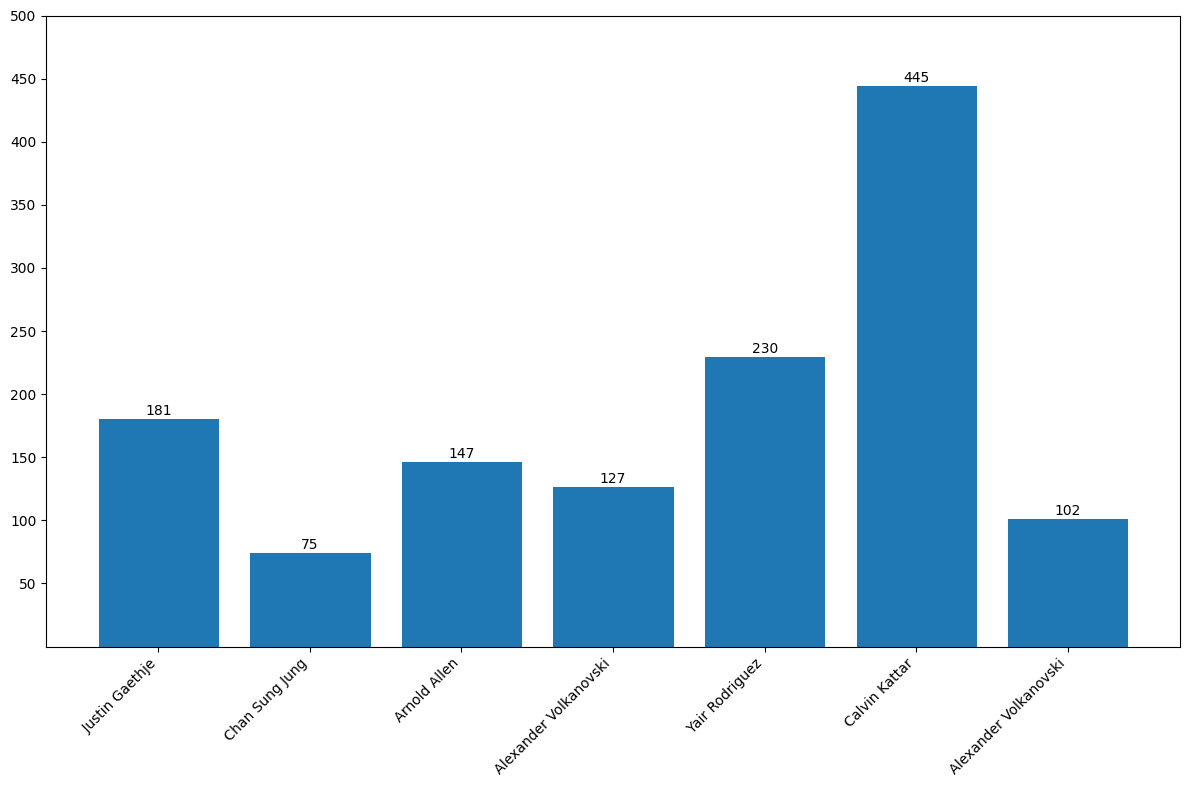

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Extract relevant data from the DataFrame
x_values = np.arange(len(max_holloway))  # Indexes for the x-axis
y_values = max_holloway['Significant_Strikes_Landed']  # Values for the y-axis
xlabel = max_holloway['Opponent']  # Opponent names for the x-axis labels

fig, ax = plt.subplots(figsize=(12,8))

# Plot the bar chart
bars = ax.bar(x_values, y_values, width=0.8, edgecolor="white", linewidth=0.7)

# Set y-axis ticks (50, 100, 150, 200, 250, 300, 350, 400)
ax.set_yticks(np.arange(50, 501, 50))

# Set x-tick labels and rotate them for better readability
ax.set_xticks(x_values)
ax.set_xticklabels(xlabel, rotation=45, ha='right')

# Optionally, adjust y-axis limit if needed
ax.set_ylim([0, 500])

# Add the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [86]:
max_holloway.to_csv('Hello.csv')